In [68]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter

In [69]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
#                  'dtype': dtypes,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

In [70]:
install2 = pd.read_csv('../input/ice-air-missions.csv.gz', **read_csv_opts)

/home/philneff/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
install3 = pd.read_csv('../input/ARTS_Missions-redacted.csv.gz', **read_csv_opts)

In [72]:
df = pd.concat([install2, install3])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20201 entries, 0 to 3233
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MissionID                  20201 non-null  int64         
 1   MissionNumber              20149 non-null  float64       
 2   MsnTailNumber              20148 non-null  object        
 3   MissionDate                20149 non-null  datetime64[ns]
 4   MissionFY                  20149 non-null  float64       
 5   MissionMonth               20149 non-null  float64       
 6   MissionWeek                20149 non-null  float64       
 7   MsnStart                   20149 non-null  object        
 8   MsnStpOne                  19993 non-null  object        
 9   MsnStpTwo                  14663 non-null  object        
 10  MsnStpThree                6192 non-null   object        
 11  MsnStpFour                 1816 non-null   object        
 12  MsnSt

In [74]:
len(df)

20201

In [75]:
df = df.set_index('MissionDate')

In [76]:
df['msnCancelReason'].unique()

array([nan, 'low transfer/removal numbers', 'Mechanical', 'Sched Change',
       'mechanical', 'Insufficient Numbers', 'holidays',
       'Host Country Denied', 'weather', "No TD's", 'Weather',
       'Lack of destination bedspace', 'Delay & Time Constraint',
       'OOC Mission Priority', 'Medical', 'Aircraft/Security Crew Issues',
       '10', '2', '1', '11', '18', '21', '8', '19', '20',
       'Mission Moved CSI', 'Canceled by FO', 'Host Country Holiday',
       'Airport Change', 'Civil unrest in foreign country',
       'Aircraft/Security/ Crew Issues', 'Mission Moved'], dtype=object)

In [77]:
df = df[~pd.notnull(df['msnCancelReason'])]

In [78]:
len(df)

18942

In [79]:
df = df.drop_duplicates('MissionNumber')

In [80]:
len(df)

17817

In [81]:
data = df.groupby(pd.Grouper(freq='M'))['MissionNumber'].count()

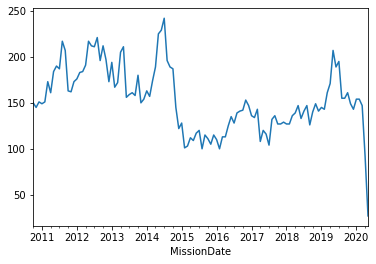

In [82]:
data.plot()

In [83]:
install2['MissionDate'].describe()

count                   16967
unique                   2566
top       2012-06-27 00:00:00
freq                       13
first     2010-10-01 00:00:00
last      2019-05-04 00:00:00
Name: MissionDate, dtype: object

In [84]:
install3['MissionDate'].describe()

count                    3182
unique                    491
top       2019-11-05 00:00:00
freq                       12
first     2018-10-01 00:00:00
last      2020-05-08 00:00:00
Name: MissionDate, dtype: object

In [85]:
df['MissionNumber'].nunique()

17816

In [86]:
data = df.groupby(pd.Grouper(freq='M'))['MissionPassengers'].sum()

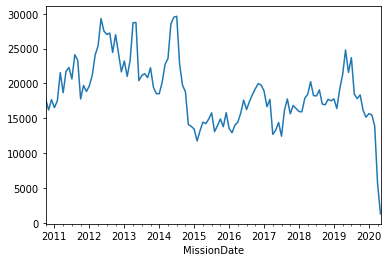

In [87]:
data.plot()

In [88]:
df['MissionPassengers'].sum()

2177030.0